We will try to fit the exponential growth of the modes 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os 

from fig_config import (
    add_grid,
    figure_features,
)  # <--- import customized functions

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

We will import the .csv file with all our data

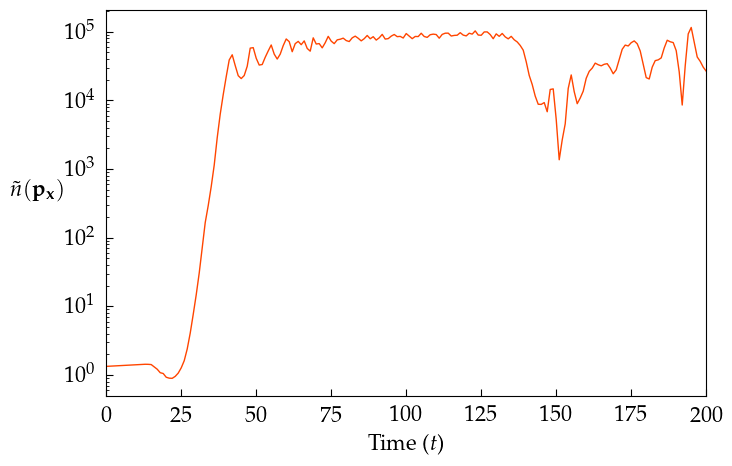

In [48]:
figure_features()

instablity_regime_df = pd.read_csv('instability_regime.csv')

# We will focus now on the regime where the system is unstable, so px = 0 

instablity_regime_df = instablity_regime_df[instablity_regime_df['px'] == 0]

# Order the data by time

instablity_regime_df = instablity_regime_df.sort_values(by = 't')

# We will now plot the data for the unstable regime

fig = plt.figure( figsize=(8, 10))

# Aspect ratio

aspect_ratio = 1.6168
fig.set_size_inches(8, 8 / aspect_ratio)

plt.yscale('log')
plt.xlabel('Time ($t$)')
plt.xlim(0, 200)
plt.ylabel(r'$\tilde{n} (\bf{p_x}) $', rotation = 0, labelpad = 20) 

plt.plot(instablity_regime_df['t'], instablity_regime_df['psi_px'], label='Data' , linewidth = 1,  c = 'orangered') 

Now, we will focus in the place where we have exponential growth which is between 25 < t < 40

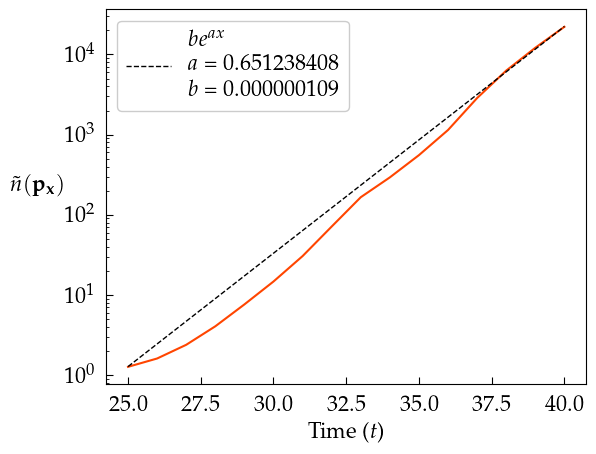

In [124]:
# Change the dataframe to go from t = 25 to t = 40 


instablity_regime_df_cut = instablity_regime_df[instablity_regime_df['t'] >= 25]
instablity_regime_df_cut = instablity_regime_df_cut[instablity_regime_df_cut['t'] <= 40]

# Fit the data to a exponential function

def exponential(x, a, b):
    return b * np.exp(a * x)

popt, pcov = curve_fit(exponential, instablity_regime_df_cut['t'], instablity_regime_df_cut['psi_px'])

a, b = popt

plt.plot(instablity_regime_df_cut['t'], instablity_regime_df_cut['psi_px'] , linewidth = 1.5,  c = 'orangered') 
plt.plot(instablity_regime_df_cut['t'], exponential(instablity_regime_df_cut['t'], *popt), label='$be^{ax}$ \n $a$ = %.9f \n $b$ = %.9f ' %  (a,b), linewidth = 1, c = 'k', ls = '--')

plt.yscale('log')
plt.xlabel('Time ($t$)')

plt.ylabel(r'$\tilde{n} (\bf{p_x}) $', rotation = 0, labelpad = 20)

plt.legend()


Now, we will see if the constants are the same by doing the log of the exponential and then fitting it to a linear

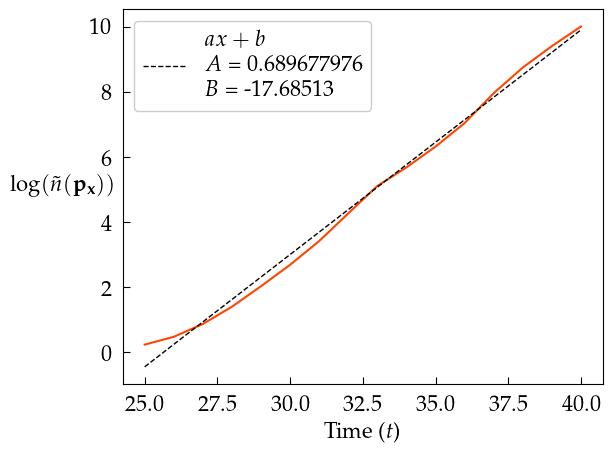

In [127]:
def linear(x,a,b):
    return a*x + b

popt, pcov = curve_fit(linear, instablity_regime_df_cut['t'], np.log(instablity_regime_df_cut['psi_px']))

a, b = popt

plt.plot(instablity_regime_df_cut['t'], np.log(instablity_regime_df_cut['psi_px']) , linewidth = 1.5,  c = 'orangered')
plt.plot(instablity_regime_df_cut['t'], linear(instablity_regime_df_cut['t'], *popt), label='$ax+ b$ \n $A$ = %.9f \n $B$ = %.5f ' %  (a,b), linewidth = 1, c = 'k', ls = '--')


plt.xlabel('Time ($t$)')
plt.ylabel(r'$\log(\tilde{n} (\bf{p_x})) $', rotation = 0, labelpad = 20)
plt.legend()



Now, we will try to put the fitted graph for the exponetial part of the graph inside the big graph

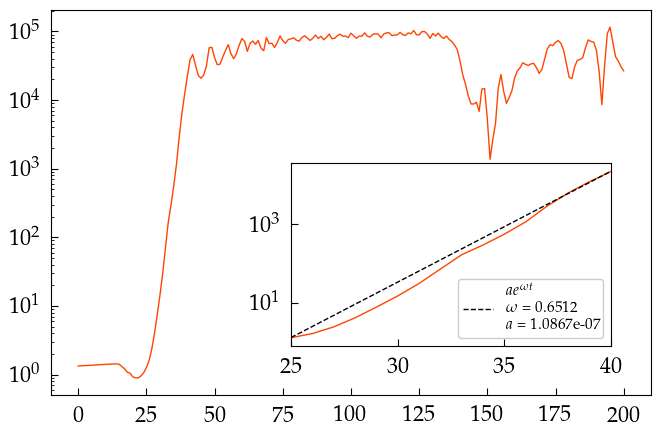

In [142]:
fig, ax1 = plt.subplots()

aspect_ratio = 1.6168

fig.set_size_inches(8, 8 / aspect_ratio)

ax1.plot(instablity_regime_df['t'], instablity_regime_df['psi_px'], label='Data' , linewidth = 1,  c = 'orangered')

plt.yscale('log')

popt, pcov = curve_fit(exponential, instablity_regime_df_cut['t'], instablity_regime_df_cut['psi_px'])

a, b = popt

# create inset axes & plot on them
left, bottom, width, height = [0.45, 0.22, 0.4, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(instablity_regime_df_cut['t'], instablity_regime_df_cut['psi_px'], linewidth = 1,  c = 'orangered')
ax2.plot(instablity_regime_df_cut['t'], exponential(instablity_regime_df_cut['t'], *popt), label='$ae^{\omega t }$ \n $\omega$ = %.4f \n $a$ = %.4e ' %  (a,b), linewidth = 1, c = 'k', ls = '--')
plt.xlim(25, 40)
ax2.legend(loc='lower right' , prop={'size': 11}, borderpad = 0.3, labelspacing = 0.3)


plt.yscale('log')
